### Test Cases for Tracking

In [1]:
import numpy as np
import scipy.spatial
import matplotlib.pyplot as plt

import sys
sys.path.append("..")

from extractor.tracking import match_modules

### extractor.tracking.match_modules

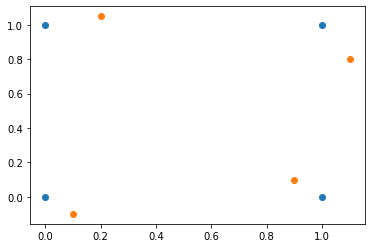

[[0, 0], [1, 1], [2, 2], [3, 3]] [] []


In [2]:
# Scenario 1 (Perfect match)

d_points = np.array([[0, 0],
                     [0, 1],
                     [1, 0],
                     [1, 1]])

t_points = d_points + np.array([[0.1, -0.1],
                                [0.2, 0.05],
                                [-0.1, 0.1],
                                [0.1, -0.2]])

plt.scatter(d_points[:, 0], d_points[:, 1])
plt.scatter(t_points[:, 0], t_points[:, 1])
plt.show()

matches, unmatched_tracks, unmatched_detections = match_modules(t_points, d_points, max_distance=1)
print(matches, unmatched_detections, unmatched_tracks)
assert np.all(matches == np.array([[0, 0], [1, 1], [2, 2], [3, 3]]))
assert unmatched_detections.size == 0
assert unmatched_tracks.size == 0

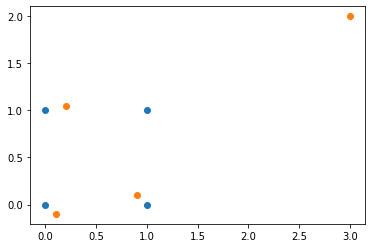

[[0, 0], [1, 1], [2, 2]] [3] [3]


In [3]:
# Scenario 1b (Perfect match with distance exceeded for single point)

d_points = np.array([[0, 0],
                     [0, 1],
                     [1, 0],
                     [1, 1]])

t_points = d_points + np.array([[0.1, -0.1],
                                [0.2, 0.05],
                                [-0.1, 0.1],
                                [2, 1]])

plt.scatter(d_points[:, 0], d_points[:, 1])
plt.scatter(t_points[:, 0], t_points[:, 1])
plt.show()

matches, unmatched_tracks, unmatched_detections = match_modules(t_points, d_points, max_distance=1)
print(matches, unmatched_detections, unmatched_tracks)
assert np.all(matches == np.array([[0, 0], [1, 1], [2, 2]]))
assert np.all(unmatched_detections == [3])
assert np.all(unmatched_tracks == [3])

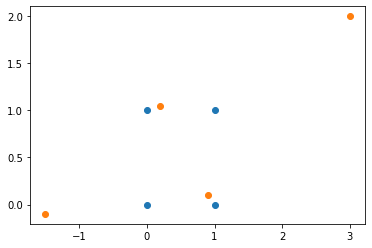

[[1, 1], [2, 2]] [3 0] [3 0]


In [4]:
# Scenario 1c (Perfect match with distance exceeded for multiple points)

d_points = np.array([[0, 0],
                     [0, 1],
                     [1, 0],
                     [1, 1]])

t_points = d_points + np.array([[-1.5, -0.1],
                                [0.2, 0.05],
                                [-0.1, 0.1],
                                [2, 1]])

plt.scatter(d_points[:, 0], d_points[:, 1])
plt.scatter(t_points[:, 0], t_points[:, 1])
plt.show()

matches, unmatched_tracks, unmatched_detections = match_modules(t_points, d_points, max_distance=1)
print(matches, unmatched_detections, unmatched_tracks)
assert np.all(matches == np.array([[1, 1], [2, 2]]))
assert np.all(unmatched_detections == [3, 0])
assert np.all(unmatched_tracks == [3, 0])

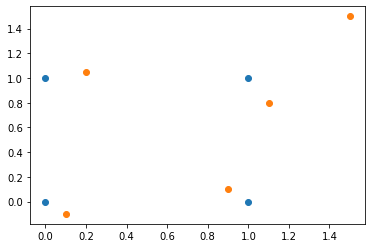

[[0, 0], [1, 1], [2, 2], [3, 3]] [] [4]


In [5]:
# Scenario 2 (Unmatched track)

d_points = np.array([[0, 0],
                     [0, 1],
                     [1, 0],
                     [1, 1]])

t_points = d_points + np.array([[0.1, -0.1],
                                [0.2, 0.05],
                                [-0.1, 0.1],
                                [0.1, -0.2]])
t_points = np.vstack([t_points, [1.5, 1.5]])

plt.scatter(d_points[:, 0], d_points[:, 1])
plt.scatter(t_points[:, 0], t_points[:, 1])
plt.show()

matches, unmatched_tracks, unmatched_detections = match_modules(t_points, d_points, max_distance=1)
print(matches, unmatched_detections, unmatched_tracks)
assert np.all(matches == np.array([[0, 0], [1, 1], [2, 2], [3, 3]]))
assert unmatched_detections.size == 0
assert np.all(unmatched_tracks == [4])

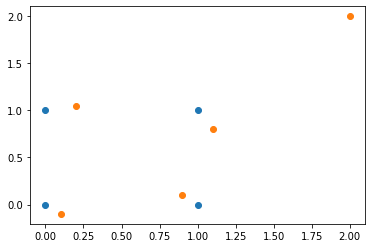

[[0, 0], [1, 1], [2, 2], [3, 3]] [] [4]


In [6]:
# Scenario 2b (Unmatched track + distance of track exceeded)

d_points = np.array([[0, 0],
                     [0, 1],
                     [1, 0],
                     [1, 1]])

t_points = d_points + np.array([[0.1, -0.1],
                                [0.2, 0.05],
                                [-0.1, 0.1],
                                [0.1, -0.2]])
t_points = np.vstack([t_points, [2, 2]])

plt.scatter(d_points[:, 0], d_points[:, 1])
plt.scatter(t_points[:, 0], t_points[:, 1])
plt.show()

matches, unmatched_tracks, unmatched_detections = match_modules(t_points, d_points, max_distance=1)
print(matches, unmatched_detections, unmatched_tracks)
assert np.all(matches == np.array([[0, 0], [1, 1], [2, 2], [3, 3]]))
assert unmatched_detections.size == 0
assert np.all(unmatched_tracks == [4])

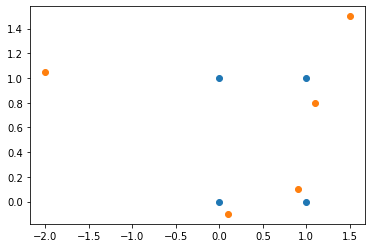

[[0, 0], [2, 2], [3, 3]] [1] [4 1]


In [7]:
# Scenario 2c (Unmatched track + distance of other pair exceeded)

d_points = np.array([[0, 0],
                     [0, 1],
                     [1, 0],
                     [1, 1]])

t_points = d_points + np.array([[0.1, -0.1],
                                [-2, 0.05],
                                [-0.1, 0.1],
                                [0.1, -0.2]])
t_points = np.vstack([t_points, [1.5, 1.5]])

plt.scatter(d_points[:, 0], d_points[:, 1])
plt.scatter(t_points[:, 0], t_points[:, 1])
plt.show()

matches, unmatched_tracks, unmatched_detections = match_modules(t_points, d_points, max_distance=1)
print(matches, unmatched_detections, unmatched_tracks)
assert np.all(matches == np.array([[0, 0], [2, 2], [3, 3]]))
assert np.all(unmatched_detections == [1])
assert np.all(unmatched_tracks == [4, 1])

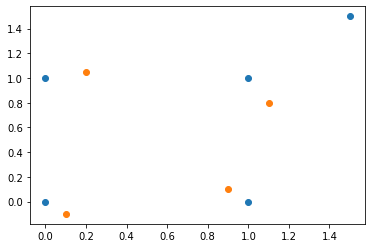

[[0, 0], [1, 1], [2, 2], [3, 3]] [4] []


In [8]:
# Scenario 3 (Unmatched detection)

d_points = np.array([[0, 0],
                     [0, 1],
                     [1, 0],
                     [1, 1]])

t_points = d_points + np.array([[0.1, -0.1],
                                [0.2, 0.05],
                                [-0.1, 0.1],
                                [0.1, -0.2]])
d_points = np.vstack([d_points, [1.5, 1.5]])

plt.scatter(d_points[:, 0], d_points[:, 1])
plt.scatter(t_points[:, 0], t_points[:, 1])
plt.show()

matches, unmatched_tracks, unmatched_detections = match_modules(t_points, d_points, max_distance=1)
print(matches, unmatched_detections, unmatched_tracks)
assert np.all(matches == np.array([[0, 0], [1, 1], [2, 2], [3, 3]]))
assert np.all(unmatched_detections == [4])
assert unmatched_tracks.size == 0

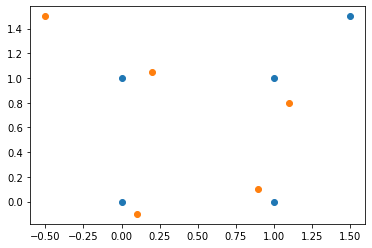

[[0, 0], [1, 1], [2, 2], [3, 3]] [4] [4]


In [9]:
# Scenario 4 (Unmatched detection & track)

d_points = np.array([[0, 0],
                     [0, 1],
                     [1, 0],
                     [1, 1]])

t_points = d_points + np.array([[0.1, -0.1],
                                [0.2, 0.05],
                                [-0.1, 0.1],
                                [0.1, -0.2]])
d_points = np.vstack([d_points, [1.5, 1.5]])
t_points = np.vstack([t_points, [-0.5, 1.5]])

plt.scatter(d_points[:, 0], d_points[:, 1])
plt.scatter(t_points[:, 0], t_points[:, 1])
plt.show()

matches, unmatched_tracks, unmatched_detections = match_modules(t_points, d_points, max_distance=1)
print(matches, unmatched_detections, unmatched_tracks)
assert np.all(matches == np.array([[0, 0], [1, 1], [2, 2], [3, 3]]))
assert np.all(unmatched_detections == [4])
assert np.all(unmatched_tracks == [4])

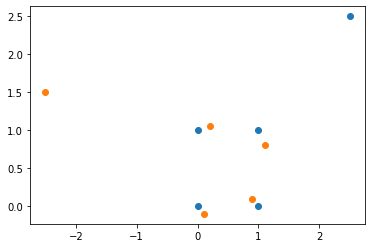

[[0, 0], [1, 1], [2, 2], [3, 3]] [4] [4]


In [10]:
# Scenario 4 (Unmatched detection & track, both distance exceeded)

d_points = np.array([[0, 0],
                     [0, 1],
                     [1, 0],
                     [1, 1]])

t_points = d_points + np.array([[0.1, -0.1],
                                [0.2, 0.05],
                                [-0.1, 0.1],
                                [0.1, -0.2]])
d_points = np.vstack([d_points, [2.5, 2.5]])
t_points = np.vstack([t_points, [-2.5, 1.5]])

plt.scatter(d_points[:, 0], d_points[:, 1])
plt.scatter(t_points[:, 0], t_points[:, 1])
plt.show()

matches, unmatched_tracks, unmatched_detections = match_modules(t_points, d_points, max_distance=1)
print(matches, unmatched_detections, unmatched_tracks)
assert np.all(matches == np.array([[0, 0], [1, 1], [2, 2], [3, 3]]))
assert np.all(unmatched_detections == [4])
assert np.all(unmatched_tracks == [4])